In [1]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [2]:
headers ={}
headers["user-agent"]= "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"
headers["Cookie"] = "laravel_session=eyJpdiI6IndaaUg1bGFhbjhOSEl4Z0tEditSR3c9PSIsInZhbHVlIjoiU2V3VmtlRldRYXJjSm04eVRxR2wxQW8xNTJaV0VwNCtEcGFlODNZRU1nVzhoRWxucmRoeTNnNVFMK0gxa3JoMFRhRGpiVHZHeXg1aWZNQVFZQmhubjBiZmhaMWZDd2RlRGdjdWxHeEhZYlp2VUVBeXQ4K3MxNUZRMWNNZlZ4NHQiLCJtYWMiOiIyMTQ0ZDZhNTI5OGU3NDA5OTk4NDk4MDMyZGE1ZDdiYzRkZTU4NjNlOGEzNWRlMjMxOTIzY2RhNzFhZjQ2NjRlIn0%3D"
URL = "https://nepsealpha.com/trading/1/history?symbol=AKPL&resolution=1D&from=1494288000&to=1628735188&currencyCode=NRS&pass=wmSqZ0ktvfWtuGVDljveTWlOU8YfGyx0QFz3Ackk"

resp = requests.get(URL, headers=headers)
raw_data = resp.json()

In [2]:
df = pd.read_json("testing.json")

In [3]:
df = df.drop('t', axis=1)
# df.corr()
# df.plot(subplots=True, layout=(6, 2), figsize=(24, 24))

In [4]:
df.tail()

,c,o,h,l,v
955,619.0,598.0,626.0,585.0,534026
956,631.0,631.0,637.0,617.1,507218
957,624.0,635.0,645.0,618.0,660814
958,685.0,630.0,686.0,630.0,840637
959,688.0,698.7,715.0,681.0,579592


In [5]:
from sklearn.preprocessing import MinMaxScaler

T = 14
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x = df[['o', 'h', 'l', 'v']].copy()
y = df['c'].copy()

x = pd.DataFrame(x_scaler.fit_transform(x), columns=["open", "high", "index", "volume"])
y = pd.DataFrame(y_scaler.fit_transform(y.values.reshape(-1, 1)), columns=["close"])

x["close"] = y["close"]

# train_x = pd.DataFrame(x_scaler.fit_transform(df), columns=["close", "open", "high", "index", "volume"])
# train = df.iloc[:-(T+1)]
# train_label = pd.DataFrame(train["close"])

# test = df.iloc[-(T+1):]
# test_label = pd.DataFrame(test["close"])
# train_scaled = pd.DataFrame(x_scaler.fit_transform(train.values), columns=["close", "open", "high", "index", "volume"])
# train_label_scaled = pd.DataFrame(train_scaled["close"])
# test_scaled = pd.DataFrame(x_scaler.fit_transform(test.values), columns=["close", "open", "high", "index", "volume"])
# test_label_scaled = pd.DataFrame(test_scaled["close"])

In [6]:
#train_scaled.plot(subplots=True, figsize=(14, 14))
print(f'{x.head(18)} {y.head(18)}')
# print(train_label.head(18))

        open      high     index    volume     close
0   0.535774  0.565637  0.550102  0.047550  0.581054
1   0.576745  0.610333  0.590432  0.052488  0.610026
2   0.600382  0.594920  0.604951  0.020705  0.597150
3   0.579897  0.582590  0.600111  0.012656  0.601978
4   0.579897  0.581049  0.600111  0.014222  0.601978
5   0.594079  0.594920  0.601724  0.025460  0.618074
6   0.594079  0.582590  0.588819  0.011333  0.608417
7   0.584624  0.573343  0.580753  0.008616  0.589102
8   0.568866  0.579508  0.588819  0.011065  0.582664
9   0.573593  0.577967  0.580753  0.009776  0.585883
10  0.584624  0.567178  0.582366  0.007634  0.581054
11  0.564139  0.557930  0.564621  0.011518  0.569787
12  0.560987  0.557930  0.566234  0.008760  0.569787
13  0.560987  0.547142  0.571074  0.006916  0.569787
14  0.548381  0.542518  0.554942  0.008549  0.553691
15  0.537350  0.536353  0.553328  0.005332  0.553691
16  0.531047  0.548683  0.550102  0.005911  0.564958
17  0.542077  0.536353  0.558168  0.011529  0.

In [7]:
def process_data(train_size):    
    X_train, Y_train = [], []
    for i in range(len(x) - T):
        X_train.append(x.iloc[i:i+T].values)
        Y_train.append(y.iloc[i+T])
    X_train, Y_train = np.array(X_train), np.array(Y_train).reshape(-1, 1)
    print(X_train.shape, Y_train.shape)
    
    split_size = int(train_size * X_train.shape[0])
    X_test, Y_test = X_train[split_size:], Y_train[split_size:]
    X_train, Y_train = X_train[:split_size], Y_train[:split_size]
    
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    return X_train, Y_train, X_test, Y_test
#     X_test, Y_test = [], []
#     for i in range(len(test) - T):
#         X_test.append(test.iloc[i:i+T].values)
#         Y_test.append(test_label.iloc[i+T])
#     X_test, Y_test = np.array(X_test), np.array(Y_test).reshape(-1, 1)
#     print(X_test.shape, Y_test.shape)

In [8]:
X_train, Y_train, X_test, Y_test = process_data(0.9)

(946, 14, 5) (946, 1)
(851, 14, 5) (851, 1) (95, 14, 5) (95, 1)


In [133]:
model = Sequential()
model.add(LSTM(128, input_shape=(T, 5), return_sequences=True, activation='linear'))
# model.add(BatchNormalization())
model.add(LSTM(units=32, return_sequences=True, activation='relu'))
# model.add(BatchNormalization())
model.add(LSTM(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['accuracy'], optimizer='adam')
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 14, 128)           68608     
_________________________________________________________________
lstm_25 (LSTM)               (None, 14, 32)            20608     
_________________________________________________________________
lstm_26 (LSTM)               (None, 128)               82432     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 175,809
Trainable params: 175,809
Non-trainable params: 0
_________________________________________________________________
None


In [134]:
history = model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
27/27 [==============================] - 3s 33ms/step - loss: 0.0325 - accuracy: 3.1726e-04
Epoch 2/50
27/27 [==============================] - 1s 33ms/step - loss: 0.0022 - accuracy: 1.7150e-04
Epoch 3/50
27/27 [==============================] - 1s 34ms/step - loss: 7.7074e-04 - accuracy: 1.7150e-04
Epoch 4/50
27/27 [==============================] - 1s 33ms/step - loss: 7.5992e-04 - accuracy: 5.4696e-04
Epoch 5/50
27/27 [==============================] - 1s 33ms/step - loss: 7.0153e-04 - accuracy: 0.0033
Epoch 6/50
27/27 [==============================] - 1s 33ms/step - loss: 6.3901e-04 - accuracy: 4.2621e-04
Epoch 7/50
27/27 [==============================] - 1s 34ms/step - loss: 6.3365e-04 - accuracy: 8.3649e-04
Epoch 8/50
27/27 [==============================] - 1s 32ms/step - loss: 5.6276e-04 - accuracy: 1.7150e-04
Epoch 9/50
27/27 [==============================] - 1s 34ms/step - loss: 5.6525e-04 - accuracy: 0.0015
Epoch 10/50
27/27 [==============================] - 

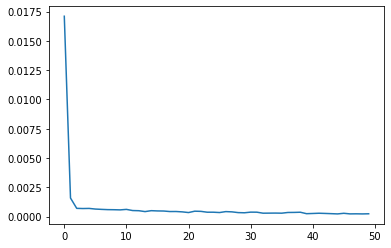

In [155]:
loss = history.history["loss"]
plt.plot(list(range(len(loss))), loss)

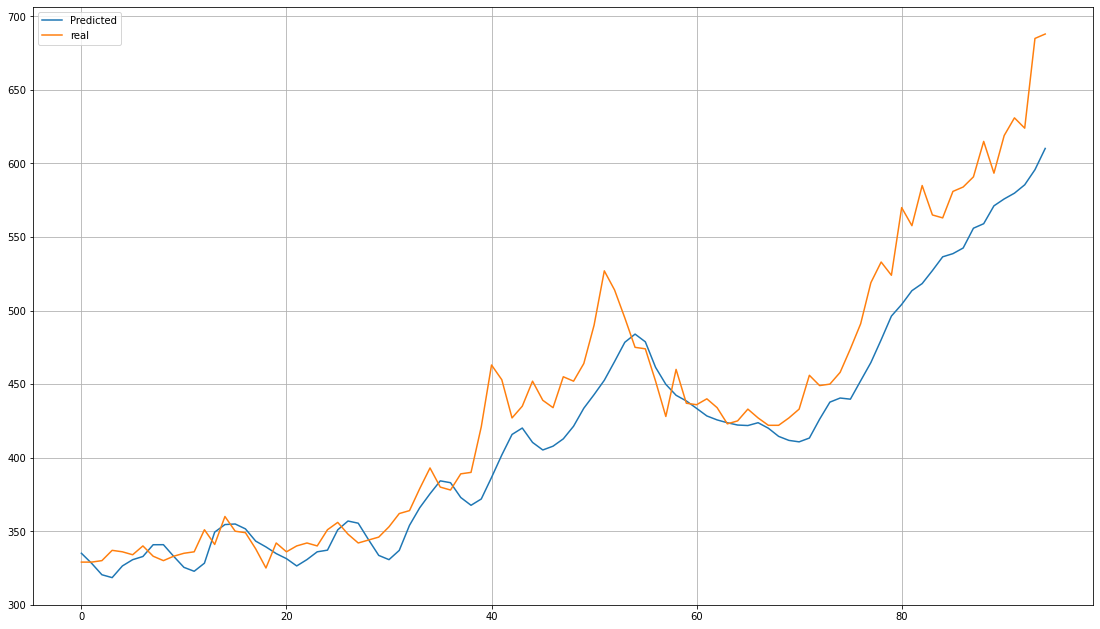

In [240]:
# print(y_scaler.inverse_transform(model.predict(X_train[1].reshape(-1, 14, 5))))
# print(y_scaler.inverse_transform([Y_train[1]]))
predicted = y_scaler.inverse_transform(model.predict(X_test))
real = y_scaler.inverse_transform(Y_test)

plt.figure(figsize=(19, 11))
plt.grid()
plt.plot(predicted, label="Predicted")
plt.plot(real, label="real")
plt.legend(loc='best')

In [241]:
model.save("umhlmodel.h5")

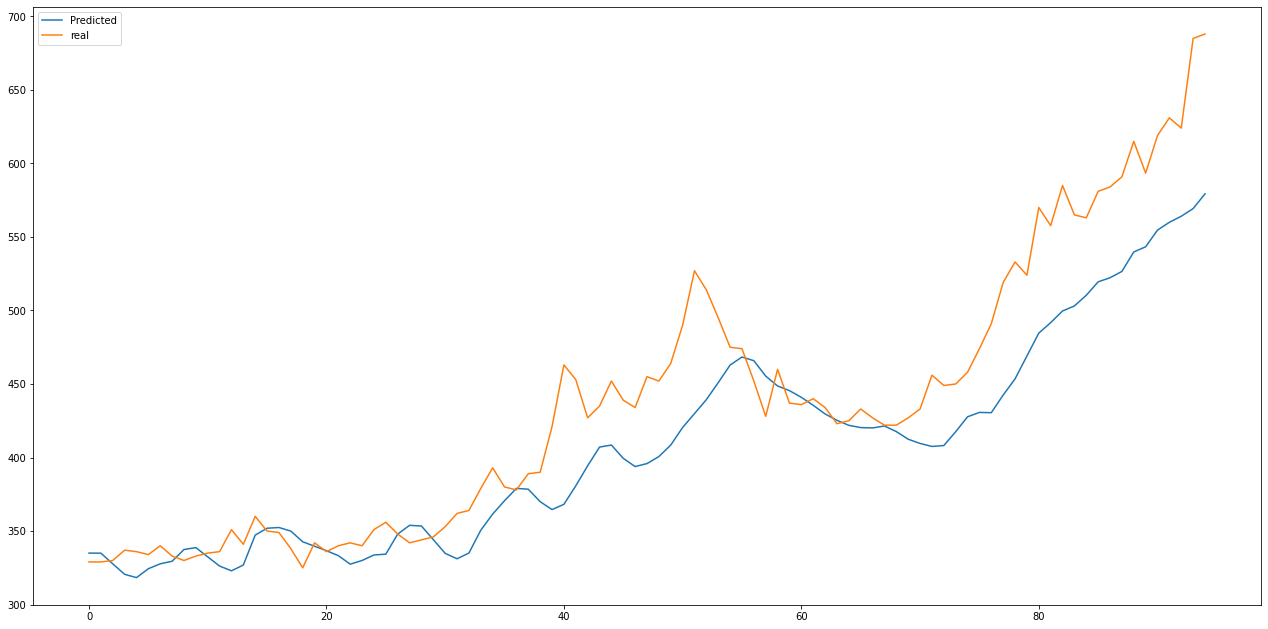

In [259]:
first = X_test[0].reshape(-1, 14, 5)

predictions = []
for i in range(Y_test.shape[0]):
    predictions.append(model.predict(first)[0][0])
    first = np.delete(first[0], 0, axis=0)
    second = np.append(X_test[i][-1][:-1], predictions[i])
    first = np.append(first, [second], axis=0)
    first = first.reshape(-1, 14, 5)

predictions = y_scaler.inverse_transform(np.array(predictions).reshape(Y_test.shape[0], -1))
x_axis = list(range(Y_test.shape[0]))
plt.figure(figsize=(22, 11))
# plt.grid()
plt.xscale('linear')
plt.plot(x_axis, predictions, label="Predicted")
plt.plot(x_axis, real, label="real")
plt.legend(loc='best')
plt.show()

In [249]:
print(metrics.mean_squared_error(predictions, real) ** .5)
print(metrics.mean_squared_error(predicted, real) ** .5)

43.09372096768025
30.714613945982176


In [43]:
from tensorflow.keras.models import load_model

model = load_model('umhlmodel.h5')
predicted_val = y_scaler.inverse_transform(
    model.predict(
        X_test[94].reshape(-1, 14, 5)
    )
)

print('predicted value: ', predicted_val)
print('true value: ', y_scaler.inverse_transform(Y_test[94].reshape(1, -1)))
# x_scaler.transform()
y_scaler.inverse_transform(
    model.predict(
        np.append(X_test[-1][1:], [x.iloc[-1]], axis=0).reshape(-1, 14, 5)
    )
)

predicted value:  [[610.20636]]
true value:  [[688.]]


array([[620.96576]], dtype=float32)